In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading dataset
file_path = "pokemon_data.csv"
df = pd.read_csv(file_path)

In [3]:
# Display basic info and first few rows
print("\nFirst few rows:")
print(df.head())


First few rows:
   #                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass  Poison  45      49       49       65   
1  2                Ivysaur  Grass  Poison  60      62       63       80   
2  3               Venusaur  Grass  Poison  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False  


## Handling Missing Values
The 'Type 2' column has missing values. Instead of keeping these values as NaN, we need to replace it and explicitly mark it as "None" to indicate no secondary type.

In [4]:
df["Type 2"] = df["Type 2"].fillna("None")

## Categorical & Numerical Features

In [5]:
categorical_features = ["Type 1", "Type 2"]  # Columns with categories
numerical_features = ["HP", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation"]
linear_target = "Attack"
logistic_target = "Legendary"

Note: 'Legendary' is unrelated to predicting the total stats, and so it is not included as a feature.

## Defining Targets

In [6]:
X = df[categorical_features + numerical_features]  # Features
linear_y = df["Attack"]                      # Target for linear regression
logistic_y = df["Legendary"]                 # Target for logistic regression

## Numerical Preprocessing
We are using Imputer to replace the missing values in numerical columns with the median.
Why do we use Median?




In [7]:
num_imputer = SimpleImputer(strategy='median')
numerical_imputed = num_imputer.fit_transform(df[numerical_features])
print("Numerical Features After Imputation:")
print(pd.DataFrame(numerical_imputed, columns=numerical_features).head(), "\n")



Numerical Features After Imputation:
     HP  Defense  Sp. Atk  Sp. Def  Speed  Generation
0  45.0     49.0     65.0     65.0   45.0         1.0
1  60.0     63.0     80.0     80.0   60.0         1.0
2  80.0     83.0    100.0    100.0   80.0         1.0
3  80.0    123.0    122.0    120.0   80.0         1.0
4  39.0     43.0     60.0     50.0   65.0         1.0 



We are using StandardScaler() to scale numerical features

In [8]:
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_imputed)
print("Numerical Features After Scaling:")
print(pd.DataFrame(numerical_scaled, columns=numerical_features).head(), "\n")


Numerical Features After Scaling:
         HP   Defense   Sp. Atk   Sp. Def     Speed  Generation
0 -0.950626 -0.797154 -0.239130 -0.248189 -0.801503   -1.399637
1 -0.362822 -0.347917  0.219560  0.291156 -0.285015   -1.399637
2  0.420917  0.293849  0.831146  1.010283  0.403635   -1.399637
3  0.420917  1.577381  1.503891  1.729409  0.403635   -1.399637
4 -1.185748 -0.989683 -0.392027 -0.787533 -0.112853   -1.399637 



##  Categorical Preprocessing
We are using OneHotEncoder() to encode categorical columns (e.g., "Type 1", "Type 2") into a numeric form by creating binary columns for each category.

In [9]:
cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_encoded = cat_encoder.fit_transform(df[categorical_features])
print("Categorical Features After One-Hot Encoding:")
print(pd.DataFrame(categorical_encoded, columns=cat_encoder.get_feature_names_out(categorical_features)).head(), "\n")



Categorical Features After One-Hot Encoding:
   Type 1_Bug  Type 1_Dark  Type 1_Dragon  Type 1_Electric  Type 1_Fairy  \
0         0.0          0.0            0.0              0.0           0.0   
1         0.0          0.0            0.0              0.0           0.0   
2         0.0          0.0            0.0              0.0           0.0   
3         0.0          0.0            0.0              0.0           0.0   
4         0.0          0.0            0.0              0.0           0.0   

   Type 1_Fighting  Type 1_Fire  Type 1_Flying  Type 1_Ghost  Type 1_Grass  \
0              0.0          0.0            0.0           0.0           1.0   
1              0.0          0.0            0.0           0.0           1.0   
2              0.0          0.0            0.0           0.0           1.0   
3              0.0          0.0            0.0           0.0           1.0   
4              0.0          1.0            0.0           0.0           0.0   

   ...  Type 2_Grass  Type 2_

## Combining the Preprocessing Steps: Preprocessing Pipeline

We are using ColumnTransformer to combine both preprocessing steps, so they can be applied together.

In [10]:
preprocessor = ColumnTransformer([
    ('num', Pipeline(steps=[('imputer', num_imputer), ('scaler', scaler)]), numerical_features),
    ('cat', cat_encoder, categorical_features)
])

# Linear Regression
Linear regression is like drawing a straight line through data points to make predictions. It finds the "best fit" line that minimizes the error between the actual values and the predicted values.





## Splitting Dataset into Training & Testing Set
for the Linear Regression Model

We are predicting the "Attack" feature based on other features

In [11]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, linear_y, test_size=0.2, random_state=42)

In [12]:
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
linear_pipeline.fit(X_train_lr, y_train_lr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['HP', 'Defense', 'Sp. Atk',
                                                   'Sp. Def', 'Speed',
                                                   'Generation']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Type 1', 'Type 2'])])),
                ('model', LinearRegression())])

In [13]:
y_pred_lr = linear_pipeline.predict(X_test_lr)

In [14]:
print("Linear Regression - Mean Squared Error:", mean_squared_error(y_test_lr, y_pred_lr))


Linear Regression - Mean Squared Error: 463.95274686813354


The Mean Squared Error (MSE) is a measure of the average squared difference between the actual and predicted values. A smaller MSE indicates that the model is performing better.

On average, the predicted Attack stat is about the square root of 463.89 (≈21.5) points away from the actual value.

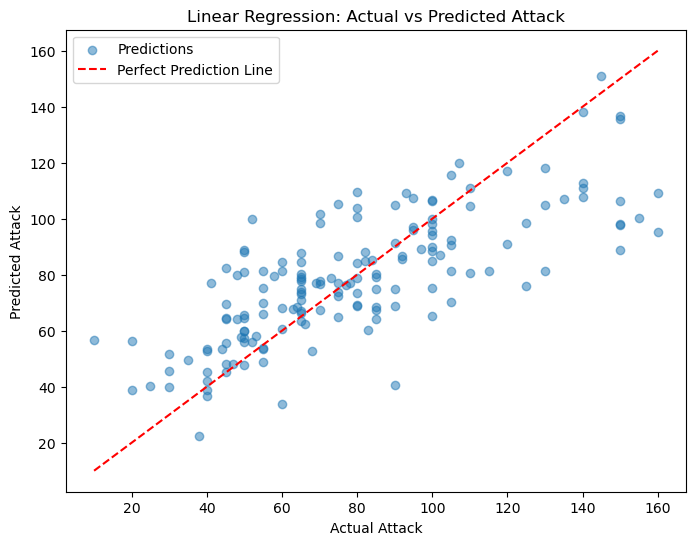

In [15]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_lr, y_pred_lr, alpha=0.5, label="Predictions")
plt.plot([y_test_lr.min(), y_test_lr.max()], [y_test_lr.min(), y_test_lr.max()], 'r--', label="Perfect Prediction Line")
plt.title("Linear Regression: Actual vs Predicted Attack")
plt.xlabel("Actual Attack")
plt.ylabel("Predicted Attack")
plt.legend()
plt.show()


# Logistic Regression
Logistic Regression is a classification algorithm used to predict binary outcomes. In this demo, we are using it to predict whether a Pokémon is `Legendary` (True) or not (False).


## Splitting data for logistic regression
We split the dataset into training and testing sets to train the model on one portion and evaluate it on unseen data.
- `test_size=0.3` means 30% of the data is reserved for testing.
- `random_state=42` ensures reproducibility.

In [16]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, logistic_y, test_size=0.3, random_state=42)

In [17]:
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [18]:
logistic_pipeline.fit(X_train_log, y_train_log)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['HP', 'Defense', 'Sp. Atk',
                                                   'Sp. Def', 'Speed',
                                                   'Generation']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Type 1', 'Type 2'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [19]:
y_pred_log = logistic_pipeline.predict(X_test_log)
accuracy = accuracy_score(y_test_log, y_pred_log)


In [20]:
print("Accuracy:", accuracy)


Accuracy: 0.9625


In [21]:
print("Classification Report:\n", classification_report(y_test_log, y_pred_log))

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.98      0.98       225
        True       0.69      0.73      0.71        15

    accuracy                           0.96       240
   macro avg       0.83      0.86      0.84       240
weighted avg       0.96      0.96      0.96       240



The classification report provides the following metrics:
- **Precision**: Out of all predicted `True`, how many were actually `True`.
- **Recall**: Out of all actual `True`, how many were correctly predicted.
- **F1-Score**: A weighted average of precision and recall.
- **Support**: The number of actual instances in each class.


For example:
- A `Precision` of `0.69` for `True` means 69% of the time, the model's `Legendary` predictions were correct.
- A `Recall` of `0.73` for `True` means 73% of actual `Legendary` Pokémon were correctly identified by the model.

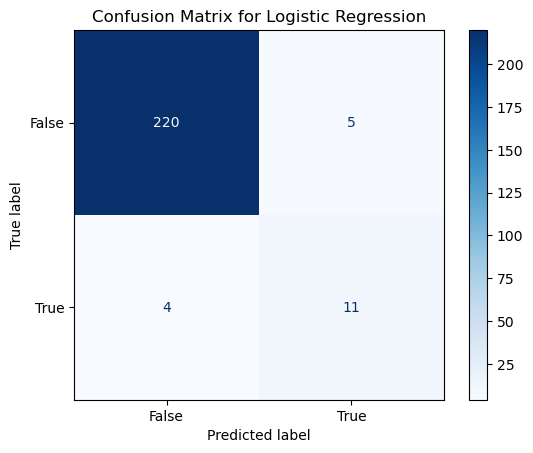

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize Confusion Matrix
ConfusionMatrixDisplay.from_estimator(logistic_pipeline, X_test_log, y_test_log, cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


### DecisionTrees and RandomForestClassifiers
A Decision Tree is like a "choose-your-own-adventure" game. For instance, if you want to eat a sandwich, 
the tree guides you through decisions: 
Are you hungry? If yes, do you have ingredients? If you do, you make a sandwich; if not, you don’t eat.

The Random Forest takes the average of many Decision Trees to improve the reliability of the predictions. Below, we'll
make a RandomForestClassifier to decide if a Pokemon is legendary or not.

In [23]:
# Splitting the data for testing and training
X = df[categorical_features + numerical_features]
y = df['Legendary']
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Create a pipeline with the preprocessor and classifier
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
tree_pipeline.fit(X_train_tree, y_train_tree)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['HP', 'Defense', 'Sp. Atk',
                                                   'Sp. Def', 'Speed',
                                                   'Generation']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Type 1', 'Type 2'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [25]:
# Make predictions
y_pred_tree = tree_pipeline.predict(X_test_tree)

In [26]:
accuracy = accuracy_score(y_test_tree, y_pred_tree)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


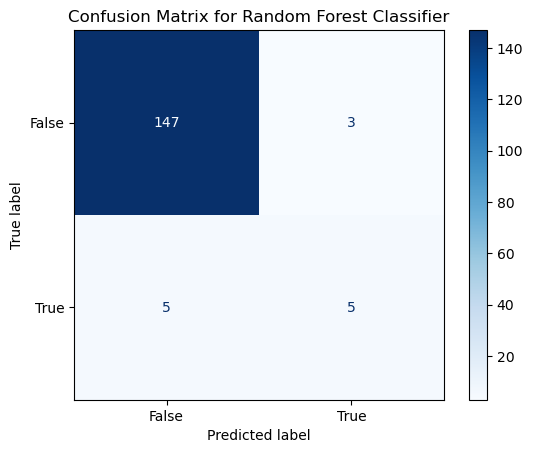

In [27]:
# Creating the confusion matrix
ConfusionMatrixDisplay.from_estimator(tree_pipeline, X_test_tree, y_test_tree, cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [28]:
print("Classification Report:\n", classification_report(y_test_tree, y_pred_tree))

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.98      0.97       150
        True       0.62      0.50      0.56        10

    accuracy                           0.95       160
   macro avg       0.80      0.74      0.76       160
weighted avg       0.95      0.95      0.95       160



Is this any better than our previous classifier? Why or why not?

## K-Nearest Neighbors

Another powerful classification tool is the K-nearest neighbors classifier to predict whether or not a Pokemon is Legendary based on Attack and Defense. 

For a demo of k-means clustering in action, see the repo here: https://github.com/mekapur/EDA.git

In [29]:
X = df[['Attack', 'Defense']]
y = df['Legendary']

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

knn_pipeline.fit(X_train_knn, y_train_knn)

y_pred_knn = knn_pipeline.predict(X_test_knn)

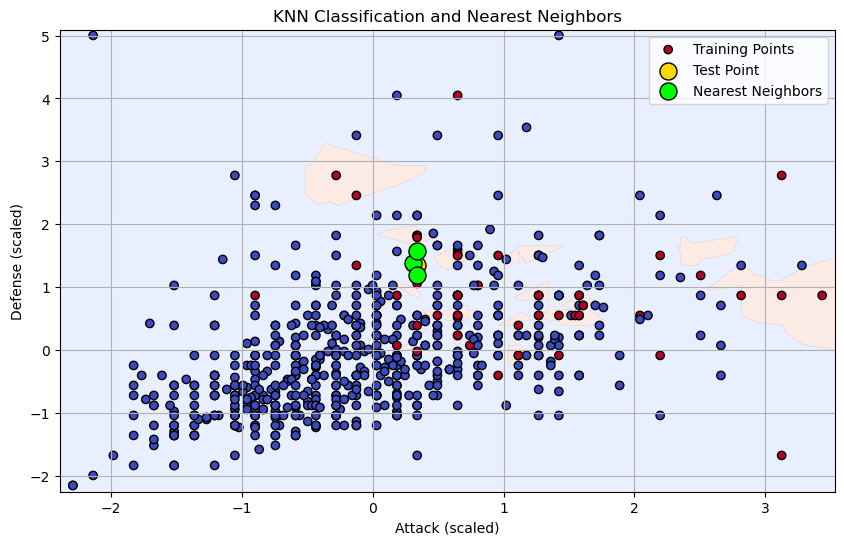

In [31]:
# Code for graphically displaying the decision boundary
# Don't worry too much about making this kind of visual
# This is just for demonstration purposes :)
scaler = knn_pipeline.named_steps['scaler']
knn = knn_pipeline.named_steps['knn']

# Scale the data for visualization
X_train_scaled = scaler.transform(X_train_knn)
X_test_scaled = scaler.transform(X_test_knn)

# Select a test point to visualize neighbors
test_point_idx = 5  # You change this to see how the nearest neighbors change
test_point = X_test_scaled[test_point_idx].reshape(1, -1)
neighbors_idx = knn.kneighbors(test_point, return_distance=False)[0]

# Create meshgrid for decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 0.1, X_train_scaled[:, 0].max() + 0.1
y_min, y_max = X_train_scaled[:, 1].min() - 0.1, X_train_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each grid point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

# Plot the training points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train_knn.map({False: 0, True: 1}),
            cmap='coolwarm', label='Training Points', edgecolor='k')

# Highlight the test point
plt.scatter(test_point[0, 0], test_point[0, 1], c='gold', label='Test Point', s=150, edgecolor='k')

# Highlight the neighbors
plt.scatter(X_train_scaled[neighbors_idx, 0], X_train_scaled[neighbors_idx, 1], 
            c='lime', label='Nearest Neighbors', s=150, edgecolor='k')

plt.title("KNN Classification and Nearest Neighbors")
plt.xlabel("Attack (scaled)")
plt.ylabel("Defense (scaled)")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
accuracy = accuracy_score(y_test_knn, y_pred_knn)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


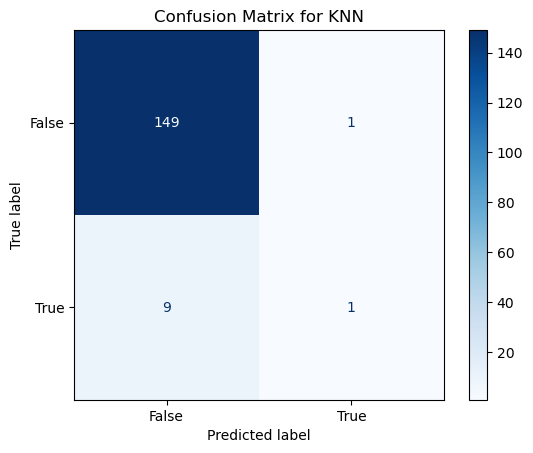

In [33]:
# Creating the confusion matrix
ConfusionMatrixDisplay.from_estimator(knn_pipeline, X_test_knn, y_test_knn, cmap='Blues')
plt.title("Confusion Matrix for KNN")
plt.show()

In [34]:
print("Classification Report:\n", classification_report(y_test_knn, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.99      0.97       150
        True       0.50      0.10      0.17        10

    accuracy                           0.94       160
   macro avg       0.72      0.55      0.57       160
weighted avg       0.92      0.94      0.92       160

